In [1]:
### Binning


#### Stroke Prediction Dataset

* **Context**
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

* **Attribute Information***
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Dataset/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.age.value_counts()

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64

In [7]:
stroke_data = df.copy()

c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\s

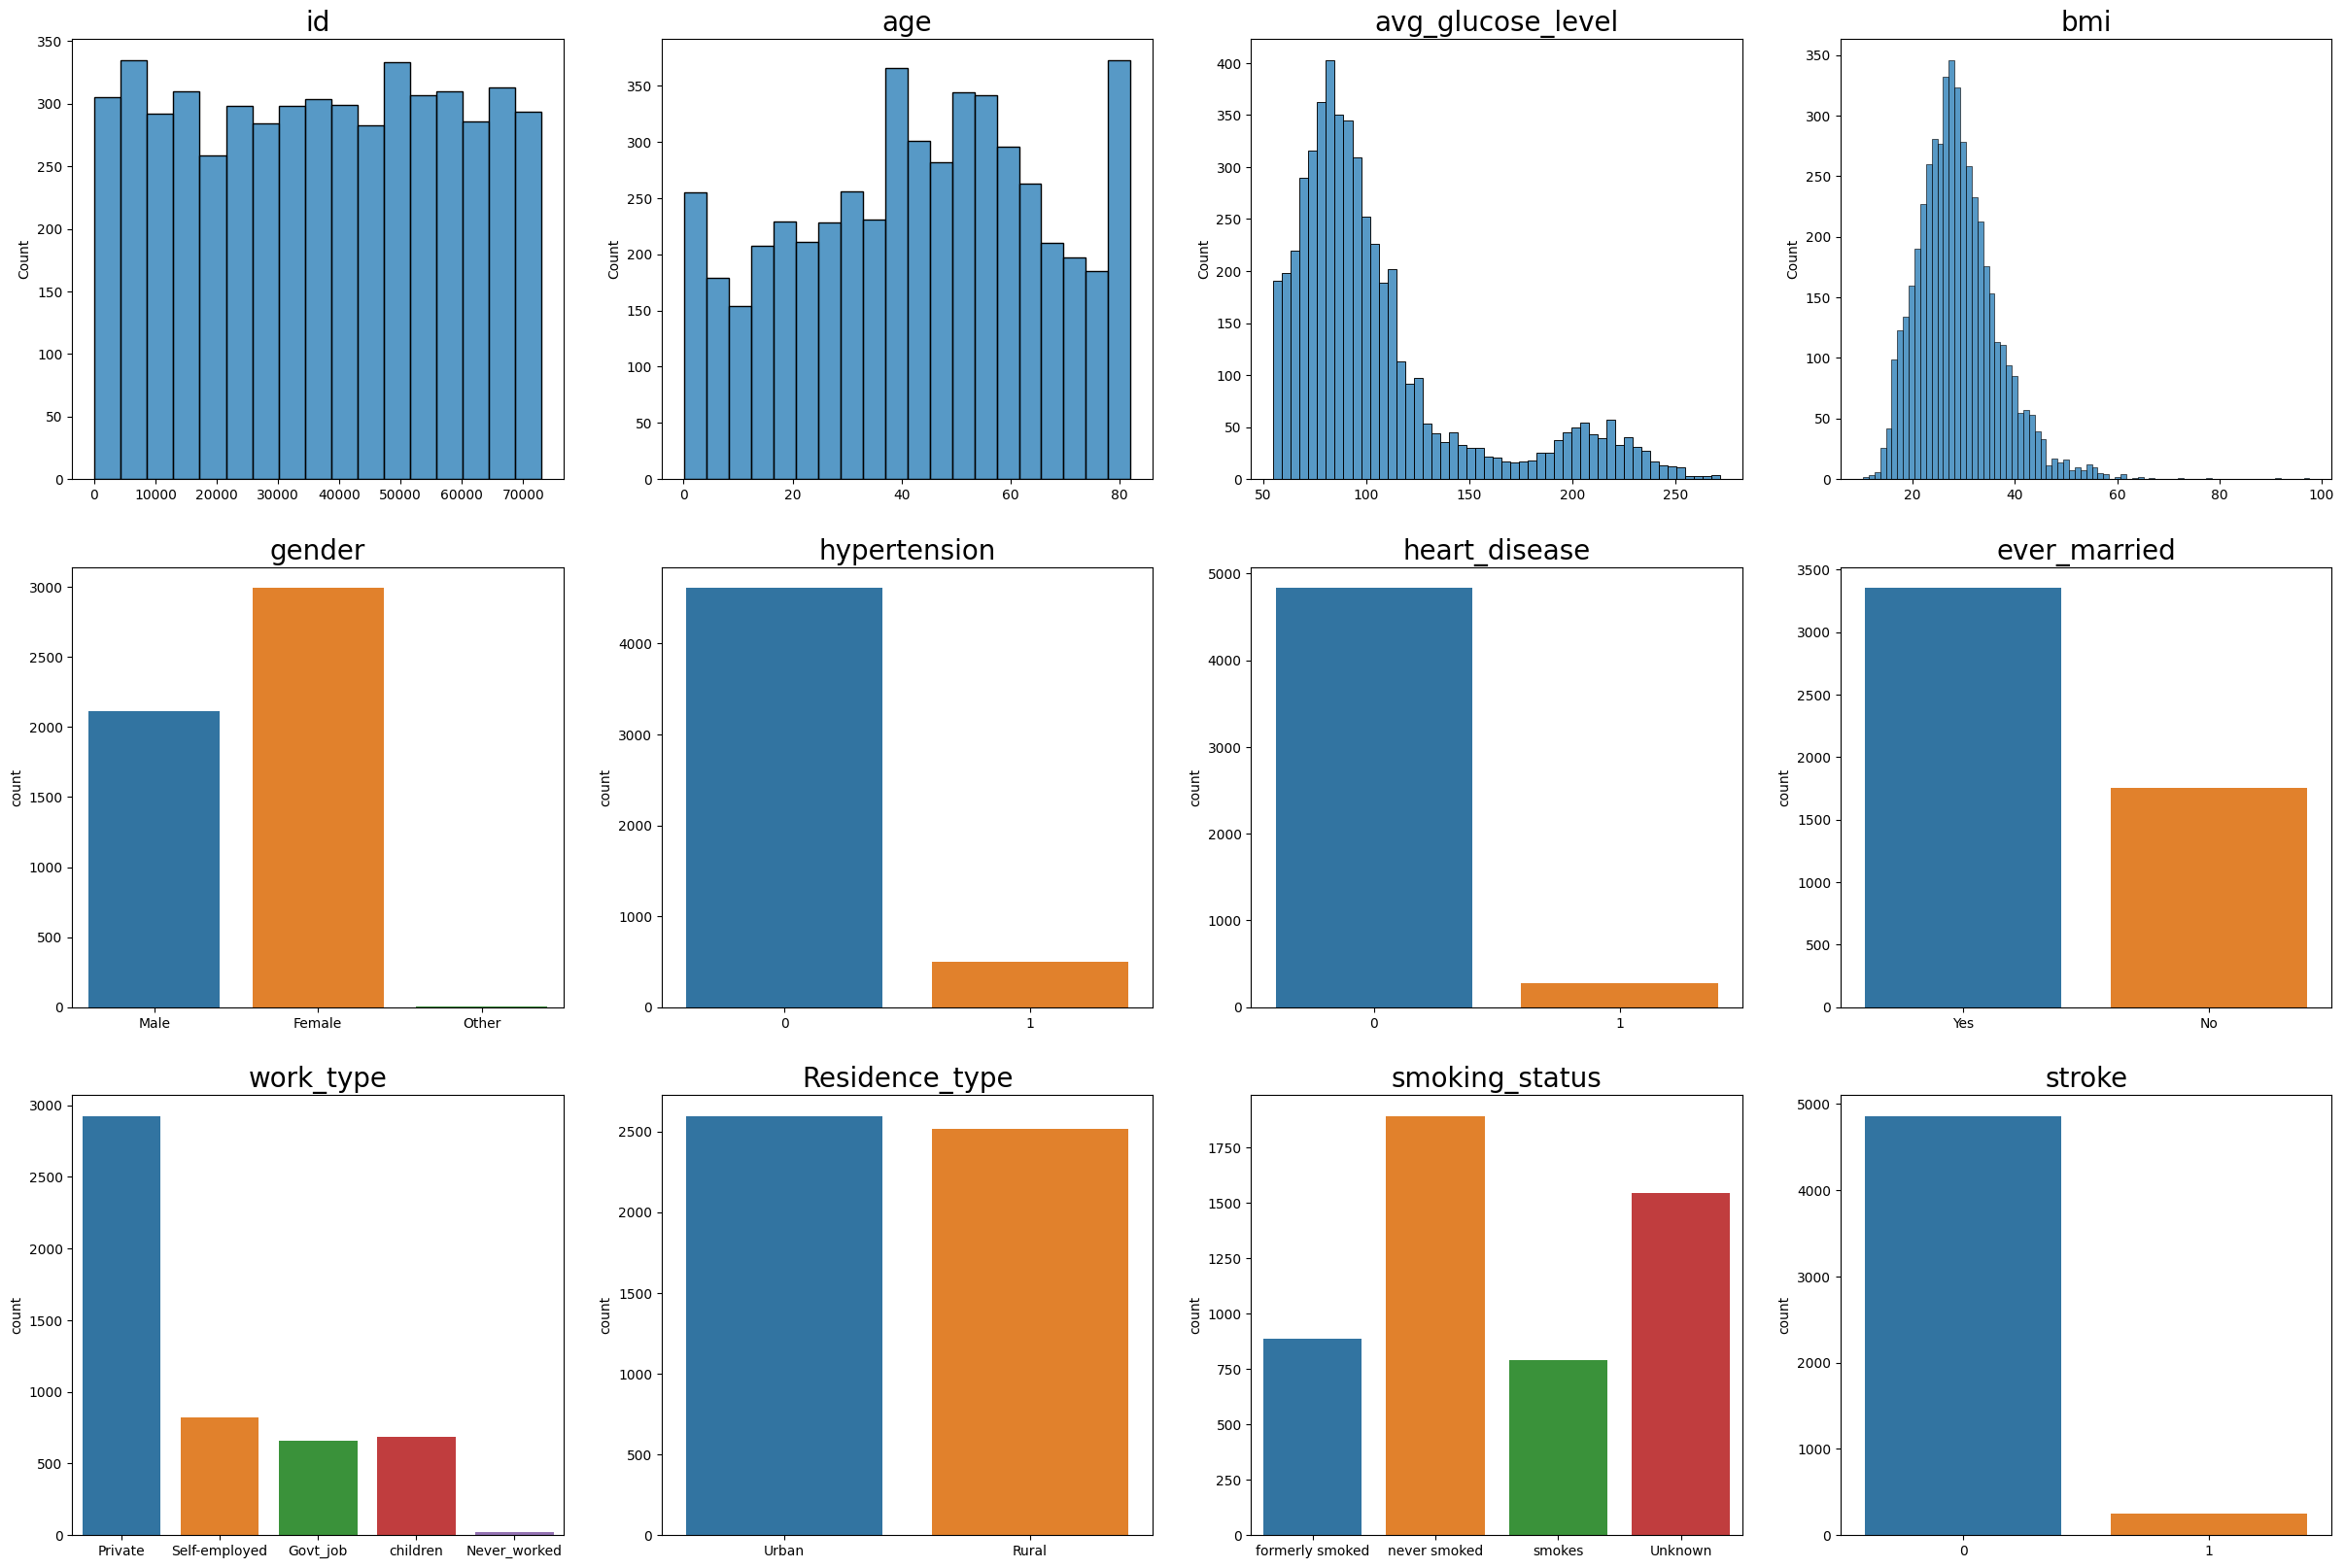

In [8]:
fig, ax = plt.subplots(3, 4)
fig.set_size_inches(30, 20)

features = ['id', 'age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension', 'heart_disease',
            'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
numerical_features = ['id', 'age', 'avg_glucose_level', 'bmi']

for i, feature in enumerate(features):
    row = i // 4
    col = i % 4
    if feature in numerical_features:
        hist = sns.histplot(data=stroke_data, x=feature, ax=ax[row, col]) 
    else:
        hist = sns.countplot(data=stroke_data, x=feature, ax=ax[row, col])
    hist.set_title(feature, fontsize=20)
    hist.set_xlabel('')
    
plt.show()

In [9]:
stroke_data.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [10]:
stroke_data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [15]:
def clean_data(stroke_data):
    # Fix class imbalance of gender
    stroke_data = stroke_data[stroke_data.gender != 'Other']
    # Fill missing bmi values with bmi mean
    stroke_data['bmi'].fillna((round(stroke_data['bmi'].mean())),
                              inplace=True)
    stroke_data = stroke_data.drop('id', axis=1) 
    return stroke_data

In [16]:
stroke_data = clean_data(df)
stroke_data

C:\Users\EsambatiReddyPrasad\AppData\Local\Temp\ipykernel_16944\3945801420.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stroke_data['bmi'].fillna((round(stroke_data['bmi'].mean())),
C:\Users\EsambatiReddyPrasad\AppData\Local\Temp\ipykernel_16944\3945801420.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_data['bmi'].fillna((ro

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.0,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,29.0,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [17]:
stroke_data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
def get_grouped_stroke_mean_data(feature):
    maximum = np.max(stroke_data[feature])
    minimum = np.min(stroke_data[feature])
    group_mean = np.array([])
    group = np.array([])

    for i in range(round(minimum), round(maximum)):
        i_data = stroke_data[(stroke_data[feature] >= (i - 0.5)) & (stroke_data[feature] < (i + 0.5))]
        group_mean = np.append(group_mean, np.mean(i_data['stroke']))
        group = np.append(group, i)
    
    group_mean = np.nan_to_num(group_mean)
    return group, group_mean

In [20]:
import numpy as np

c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\s

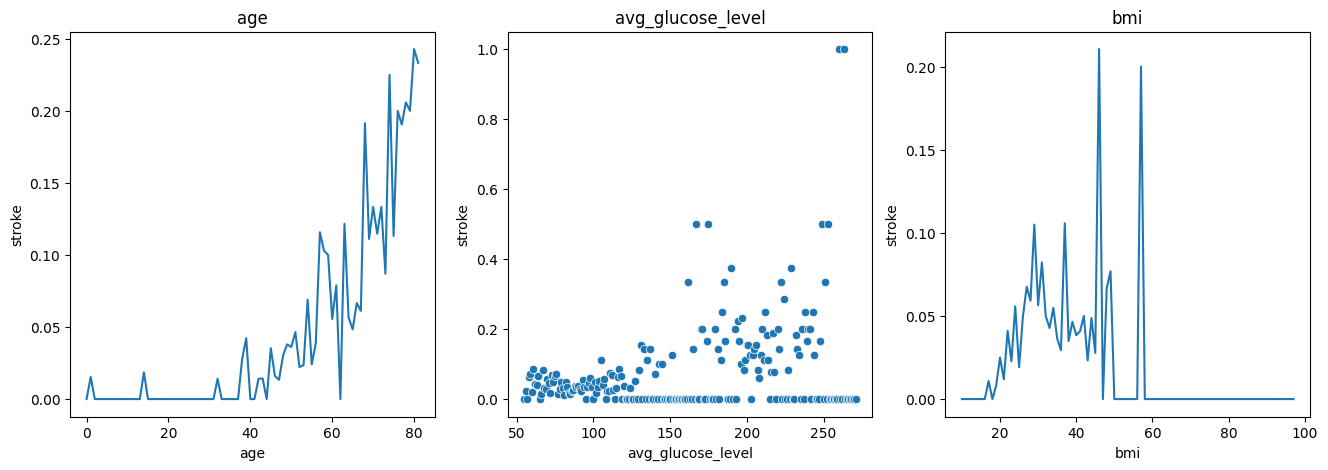

In [21]:
age,  age_mean =  get_grouped_stroke_mean_data('age')
gluc, gluc_mean = get_grouped_stroke_mean_data('avg_glucose_level')
bmi,  bmi_mean =  get_grouped_stroke_mean_data('bmi')

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(16, 5)

sns.lineplot(   x=age,  y=age_mean,  ax=ax[0]).set(xlabel='age', ylabel='stroke', title='age')
sns.scatterplot(x=gluc, y=gluc_mean, ax=ax[1]).set(xlabel='avg_glucose_level', ylabel='stroke', title='avg_glucose_level')
sns.lineplot(   x=bmi,  y=bmi_mean,  ax=ax[2]).set(xlabel='bmi', ylabel='stroke', title='bmi')

plt.show()

In [22]:
pd.crosstab(stroke_data.stroke, stroke_data.hypertension)

hypertension,0,1
stroke,,
0,4428,432
1,183,66


In [23]:
pd.crosstab(stroke_data.stroke, stroke_data.age)

age,0.08,0.16,0.24,0.32,0.40,0.48,0.56,0.64,0.72,0.80,...,73.00,74.00,75.00,76.00,77.00,78.00,79.00,80.00,81.00,82.00
stroke,,,,,,,,,,,,,,,,,,,,,
0,2,3,5,5,2,3,5,4,5,4,...,42,31,47,40,34,81,68,53,46,47
1,0,0,0,0,0,0,0,0,0,0,...,4,9,6,10,8,21,17,17,14,9


In [24]:
pd.crosstab(stroke_data.stroke, stroke_data.avg_glucose_level)

avg_glucose_level,55.12,55.22,55.23,55.25,55.26,55.27,55.28,55.32,55.34,55.35,...,259.63,260.85,261.67,263.32,263.56,266.59,267.60,267.61,267.76,271.74
stroke,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,2,1,...,0,1,1,0,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [25]:
pd.crosstab(stroke_data.stroke, stroke_data.bmi)

bmi,10.3,11.3,11.5,12.0,12.3,12.8,13.0,13.2,13.3,13.4,...,61.2,61.6,63.3,64.4,64.8,66.8,71.9,78.0,92.0,97.6
stroke,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
pd.crosstab(stroke_data.stroke, stroke_data.hypertension, normalize='columns')

hypertension,0,1
stroke,,
0,0.960312,0.86747
1,0.039688,0.13253


In [27]:
pd.crosstab(stroke_data.stroke, stroke_data.heart_disease)

heart_disease,0,1
stroke,,
0,4631,229
1,202,47


In [28]:
pd.crosstab(stroke_data.stroke, stroke_data.heart_disease, normalize='columns')

heart_disease,0,1
stroke,,
0,0.958204,0.82971
1,0.041796,0.17029


* You can see that approx. 17% of people with heart disease have a stroke. Of the people who do not have heart disease, only about 4% have a stroke. It can therefore be concluded that heart disease increases the likelihood of a stroke.

In [29]:
# Remove people under 20, because they are probably not married
stroke_data = stroke_data[stroke_data.age >= 20]

In [30]:
pd.crosstab(stroke_data.stroke, stroke_data.ever_married)

ever_married,No,Yes
stroke,,
0,766,3130
1,27,220


In [31]:
pd.crosstab(stroke_data.stroke, stroke_data.ever_married, normalize='columns')

ever_married,No,Yes
stroke,,
0,0.965952,0.934328
1,0.034048,0.065672


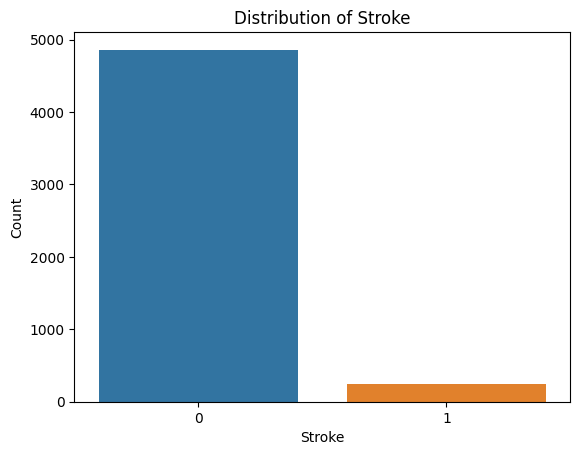

In [32]:
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

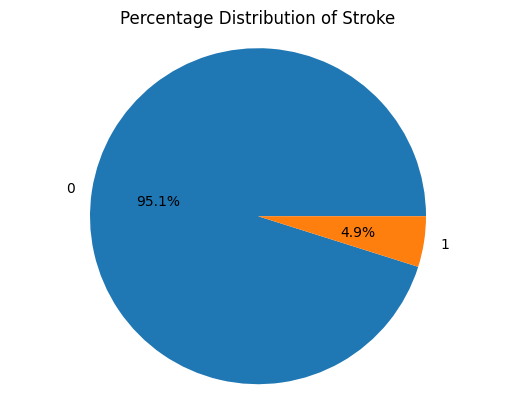

In [33]:
# Calculate percentage distribution
stroke_distribution = df['stroke'].value_counts(normalize=True) * 100

# Plotting
plt.pie(stroke_distribution, labels=stroke_distribution.index, autopct='%1.1f%%')
plt.axis('equal')  
plt.title('Percentage Distribution of Stroke')
plt.show()

In [34]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


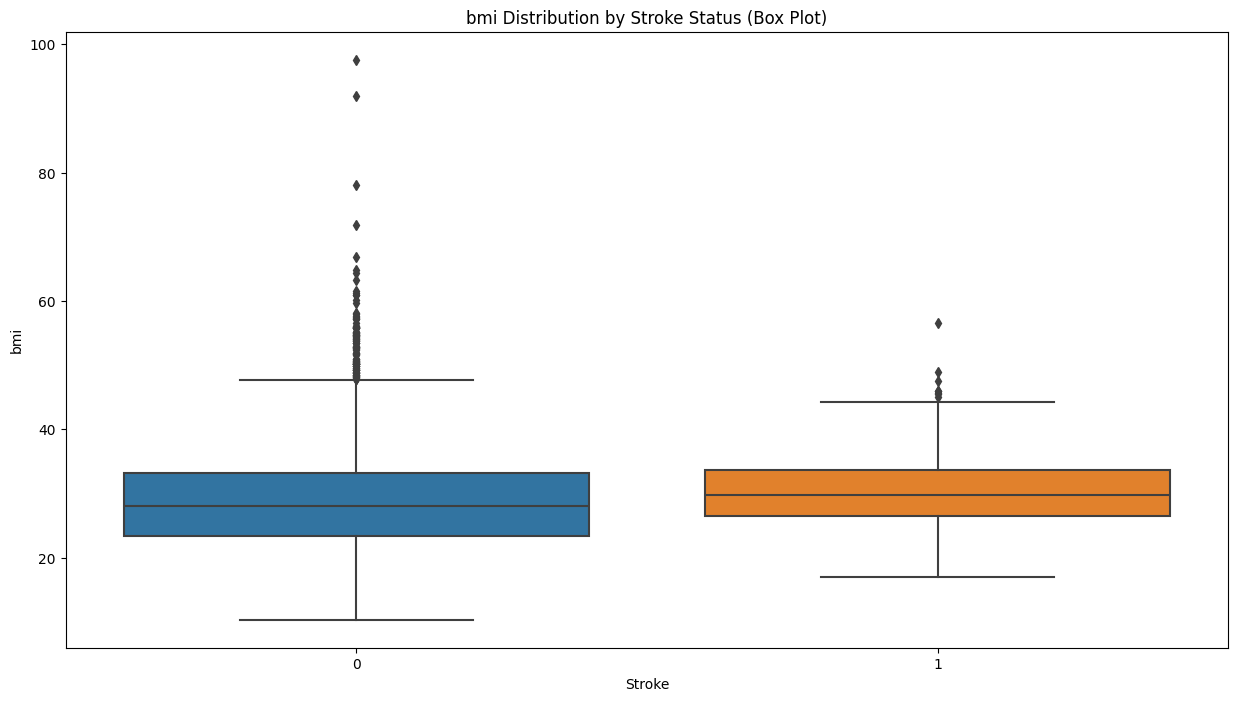

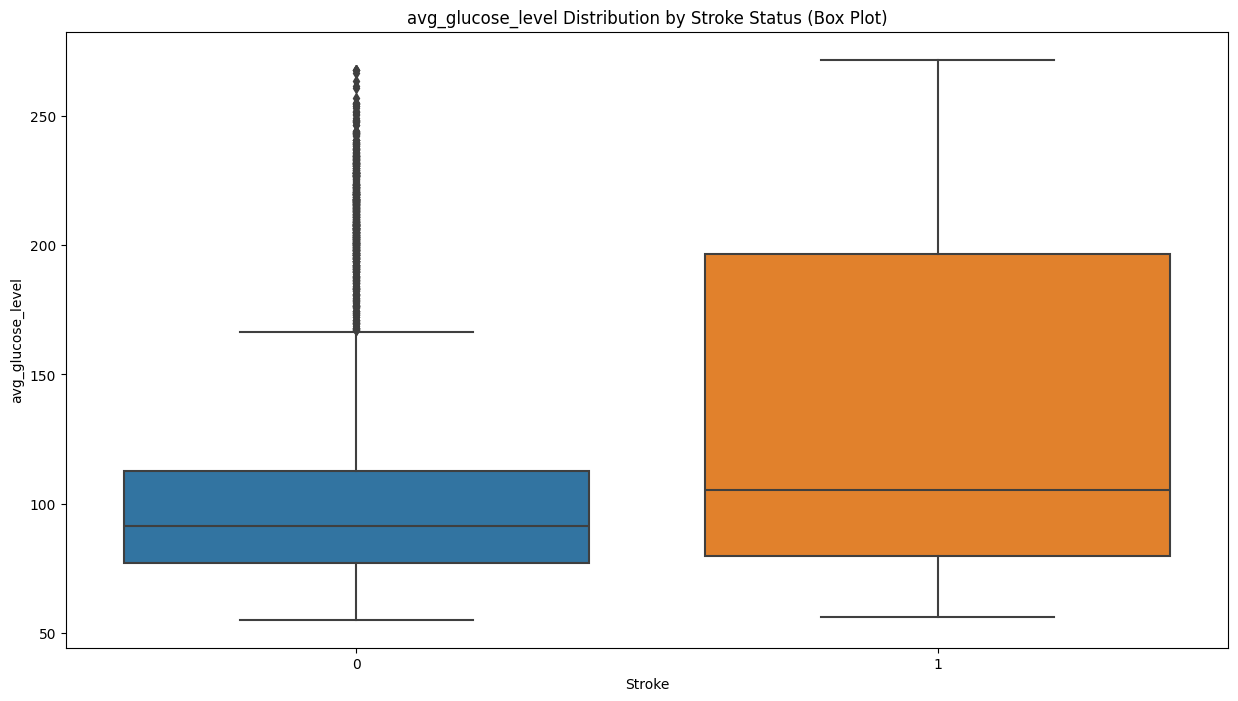

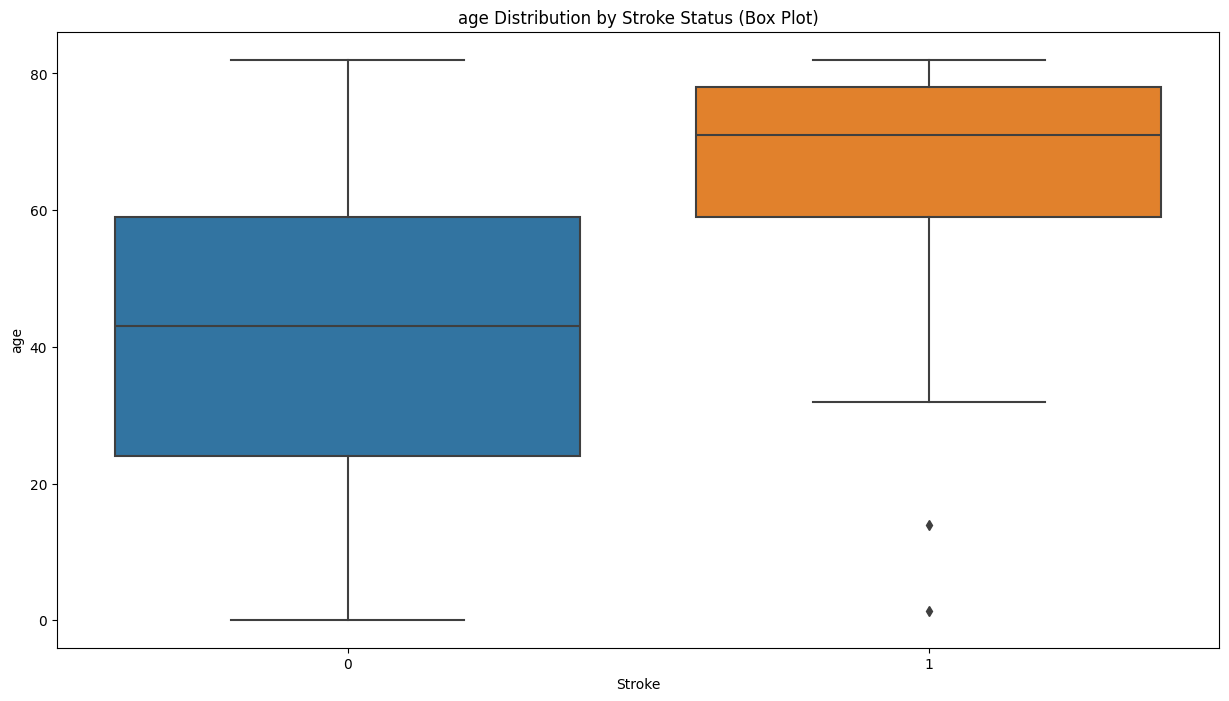

In [37]:
continuous_features = ['bmi','avg_glucose_level','age']

for column in continuous_features:
    plt.figure(figsize=(15, 8))
    sns.boxplot(x='stroke', y=column, data=df)
    plt.title(f'{column} Distribution by Stroke Status (Box Plot)')
    plt.xlabel('Stroke')
    plt.ylabel(column)
    plt.show()

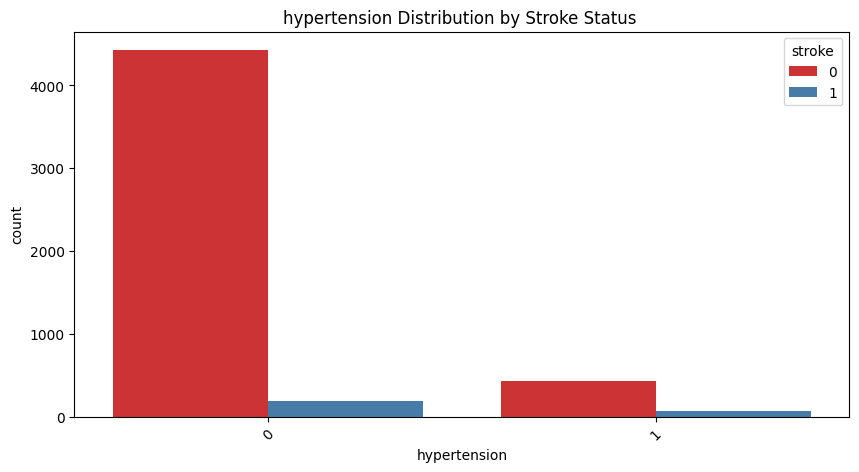

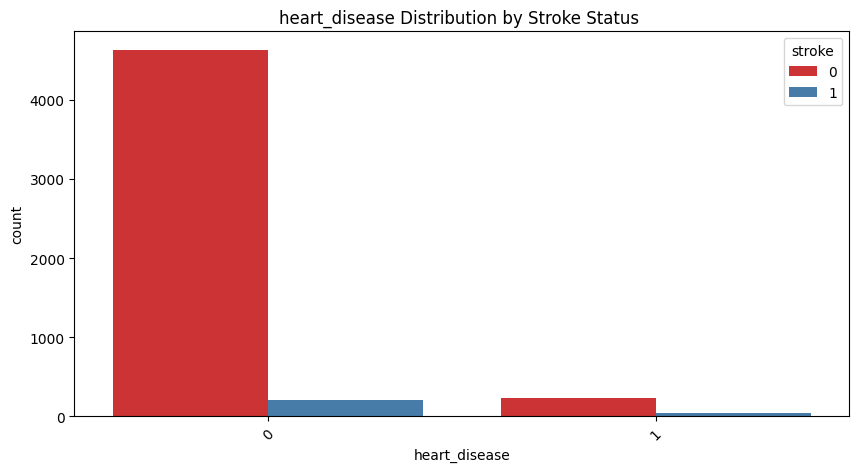

In [39]:
cols = ['hypertension', 'heart_disease']  

for column in cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df, hue='stroke', palette="Set1")    
    plt.title(f'{column} Distribution by Stroke Status ')
    plt.xticks(rotation=45)
    plt.show()

In [41]:
# Separate categorical data
categorical_cols = df.select_dtypes(include=['object'])

# Separate numerical data and remove 'id' and 'stroke' columns
numerical_cols = df.select_dtypes(exclude=['object']).drop(columns=['id', 'stroke'], errors='ignore')

# Display the first few rows of each
print("Categorical Data:")
print(categorical_cols.head())

print("\nNumerical Data:")
print(numerical_cols.head())


Categorical Data:
   gender ever_married      work_type Residence_type   smoking_status
0    Male          Yes        Private          Urban  formerly smoked
1  Female          Yes  Self-employed          Rural     never smoked
2    Male          Yes        Private          Rural     never smoked
3  Female          Yes        Private          Urban           smokes
4  Female          Yes  Self-employed          Rural     never smoked

Numerical Data:
    age  hypertension  heart_disease  avg_glucose_level   bmi
0  67.0             0              1             228.69  36.6
1  61.0             0              0             202.21   NaN
2  80.0             0              1             105.92  32.5
3  49.0             0              0             171.23  34.4
4  79.0             1              0             174.12  24.0


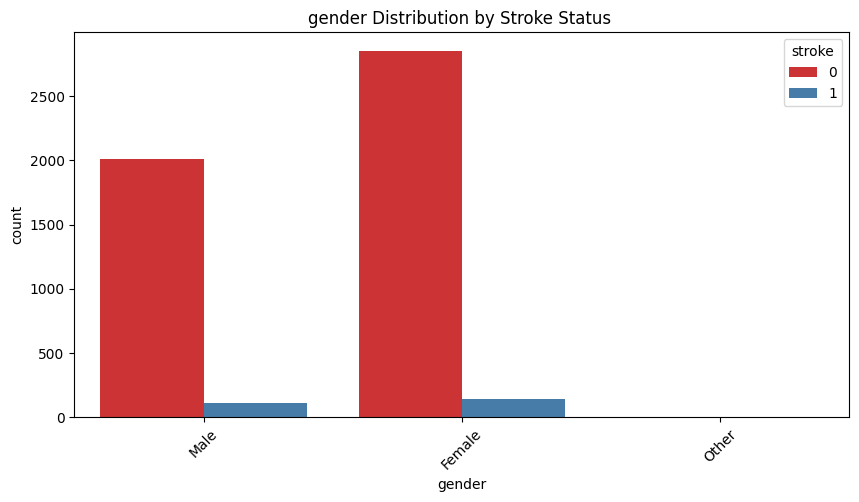

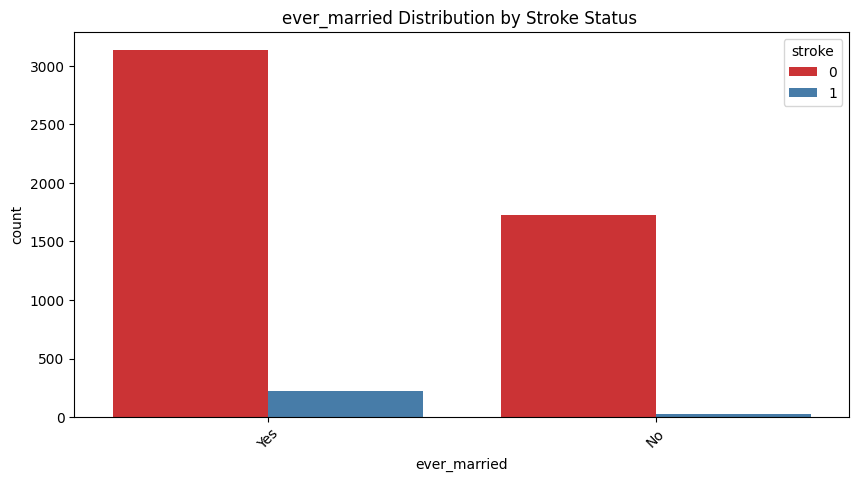

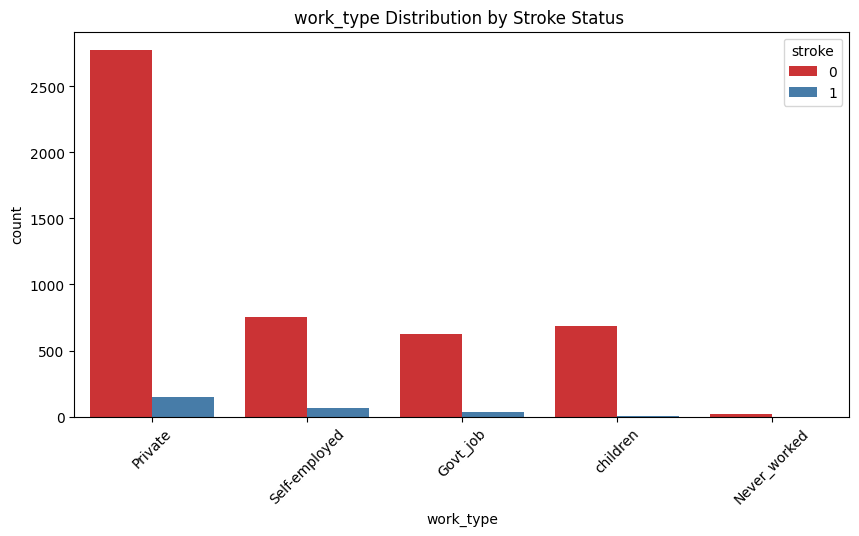

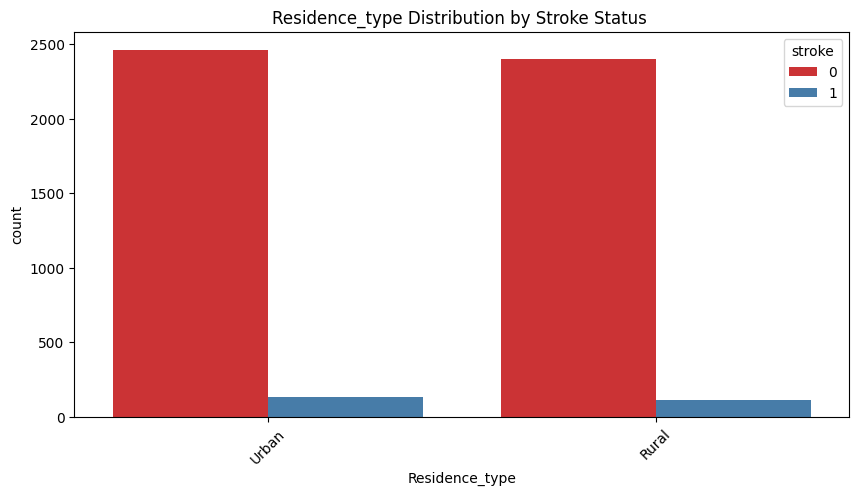

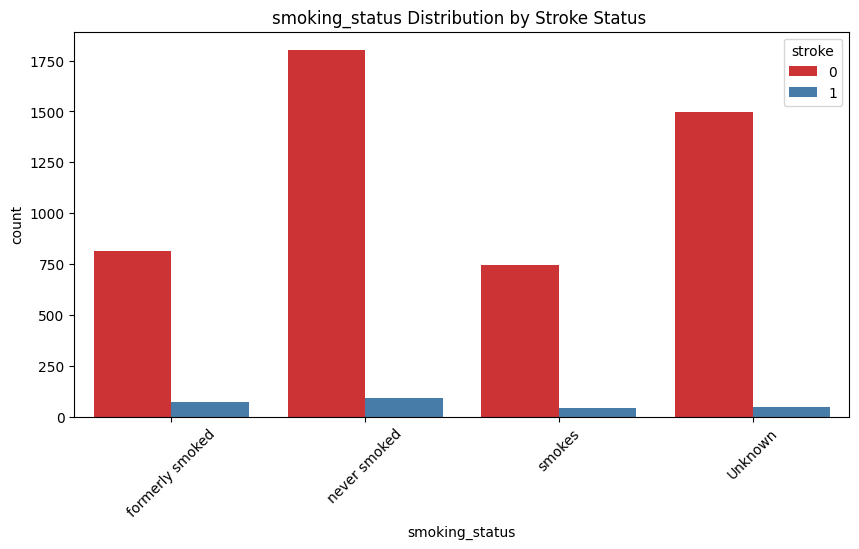

In [42]:
for column in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df, hue='stroke', palette="Set1") 
    plt.title(f'{column} Distribution by Stroke Status ')
    plt.xticks(rotation=45)
    plt.show()

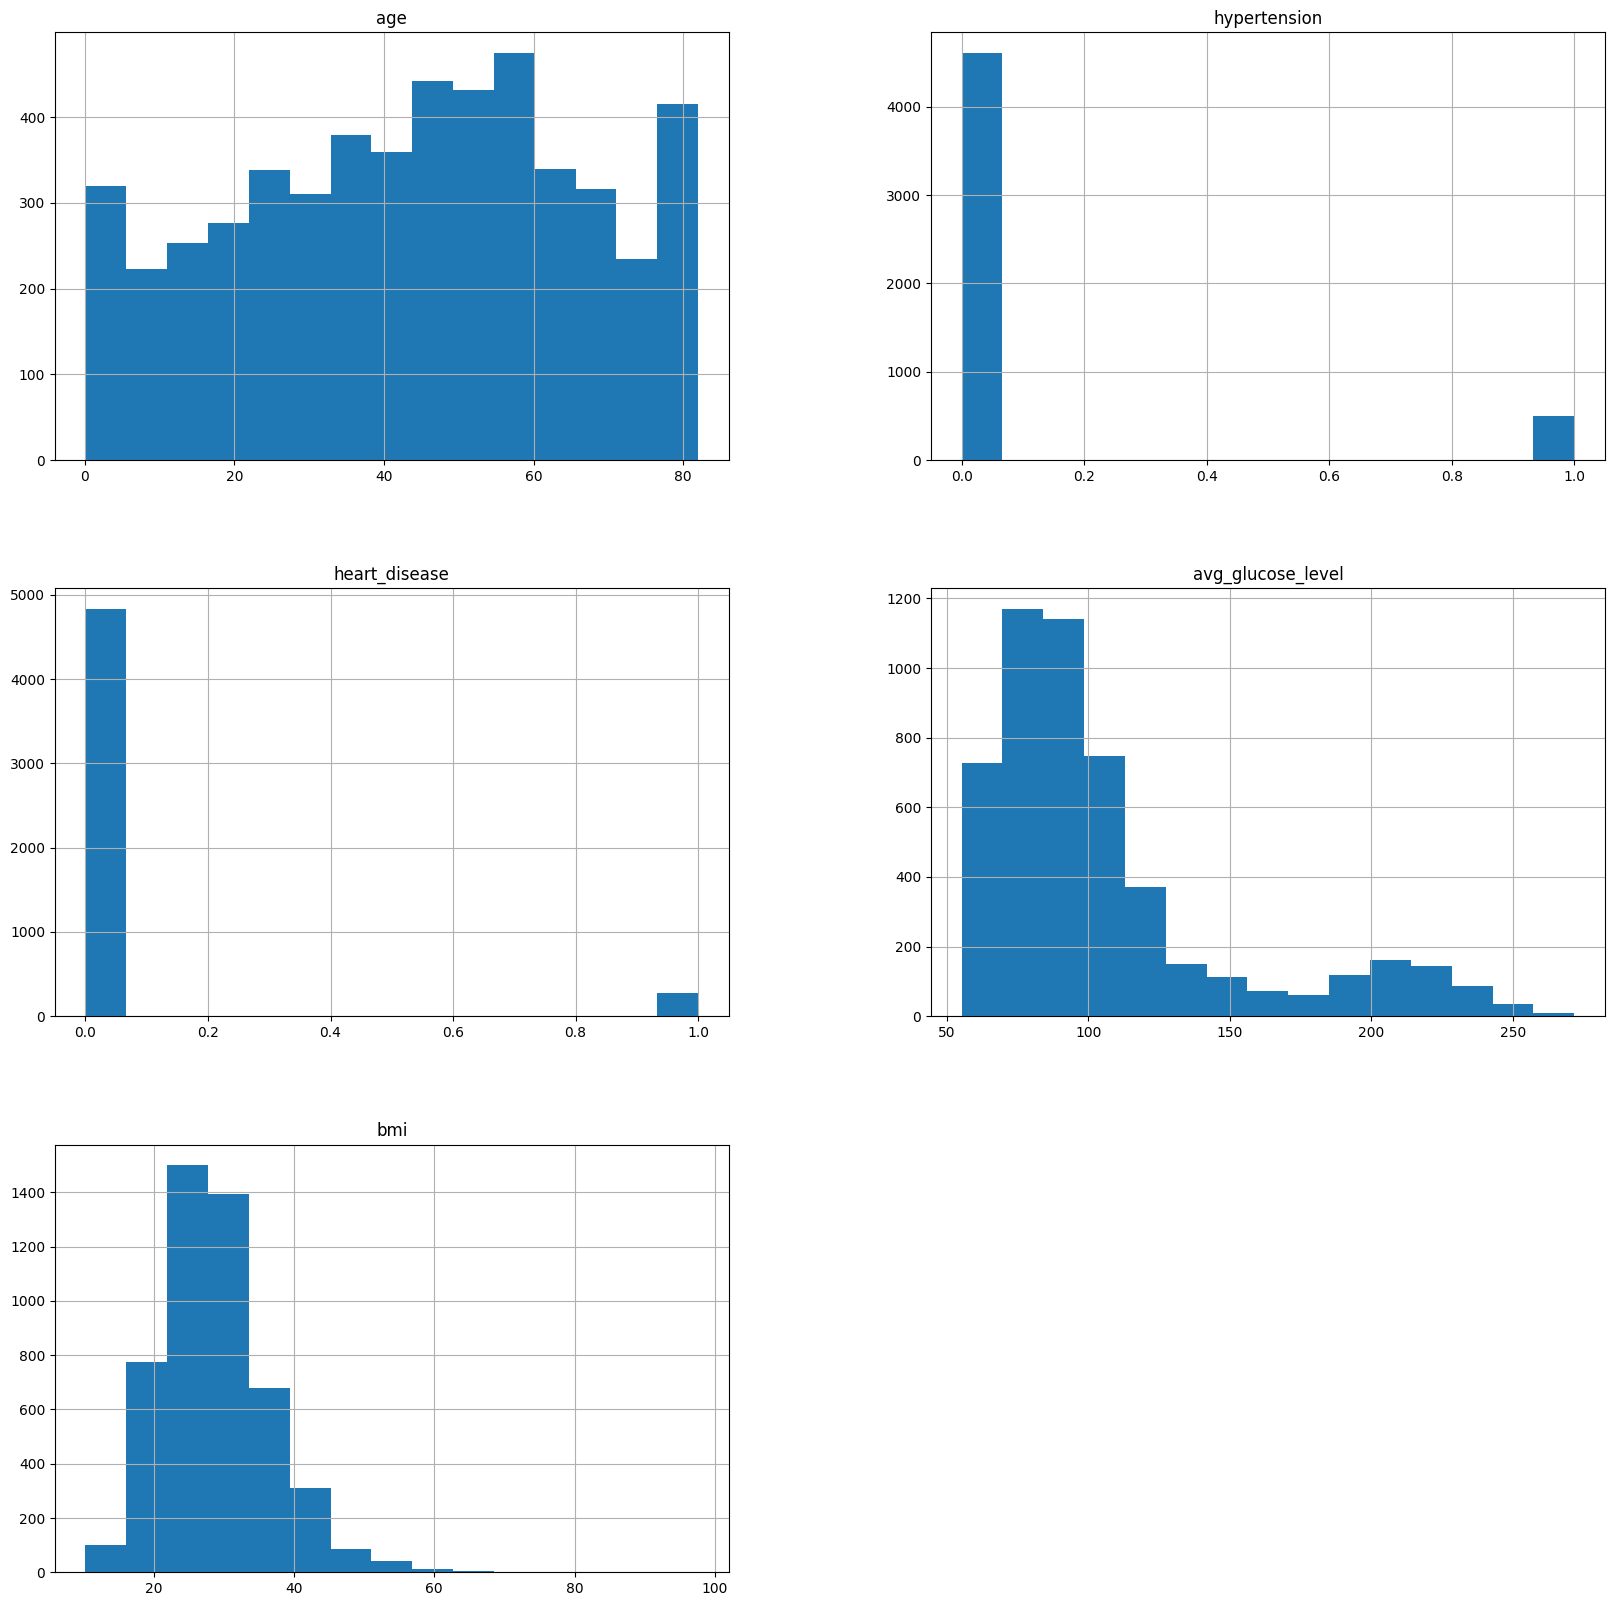

In [43]:
# Histograms for numerical features

numerical_cols.hist(bins=15, figsize=(20, 20), layout=(3, 2))
plt.show()

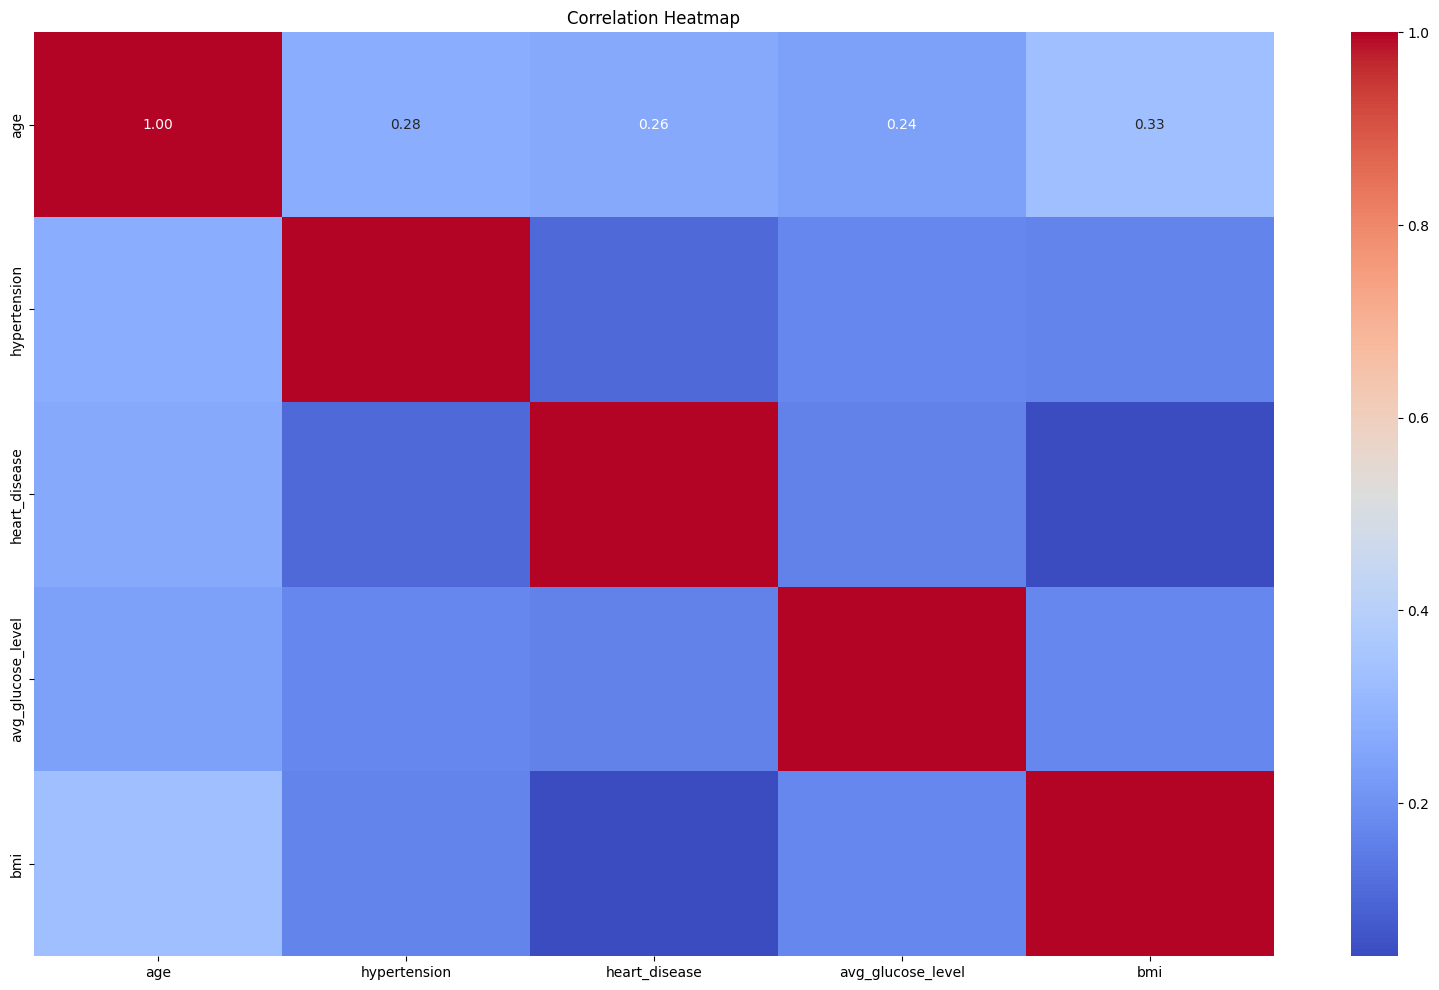

In [44]:
# Calculate the correlation matrix
corr = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_da

<Figure size 2000x1500 with 0 Axes>

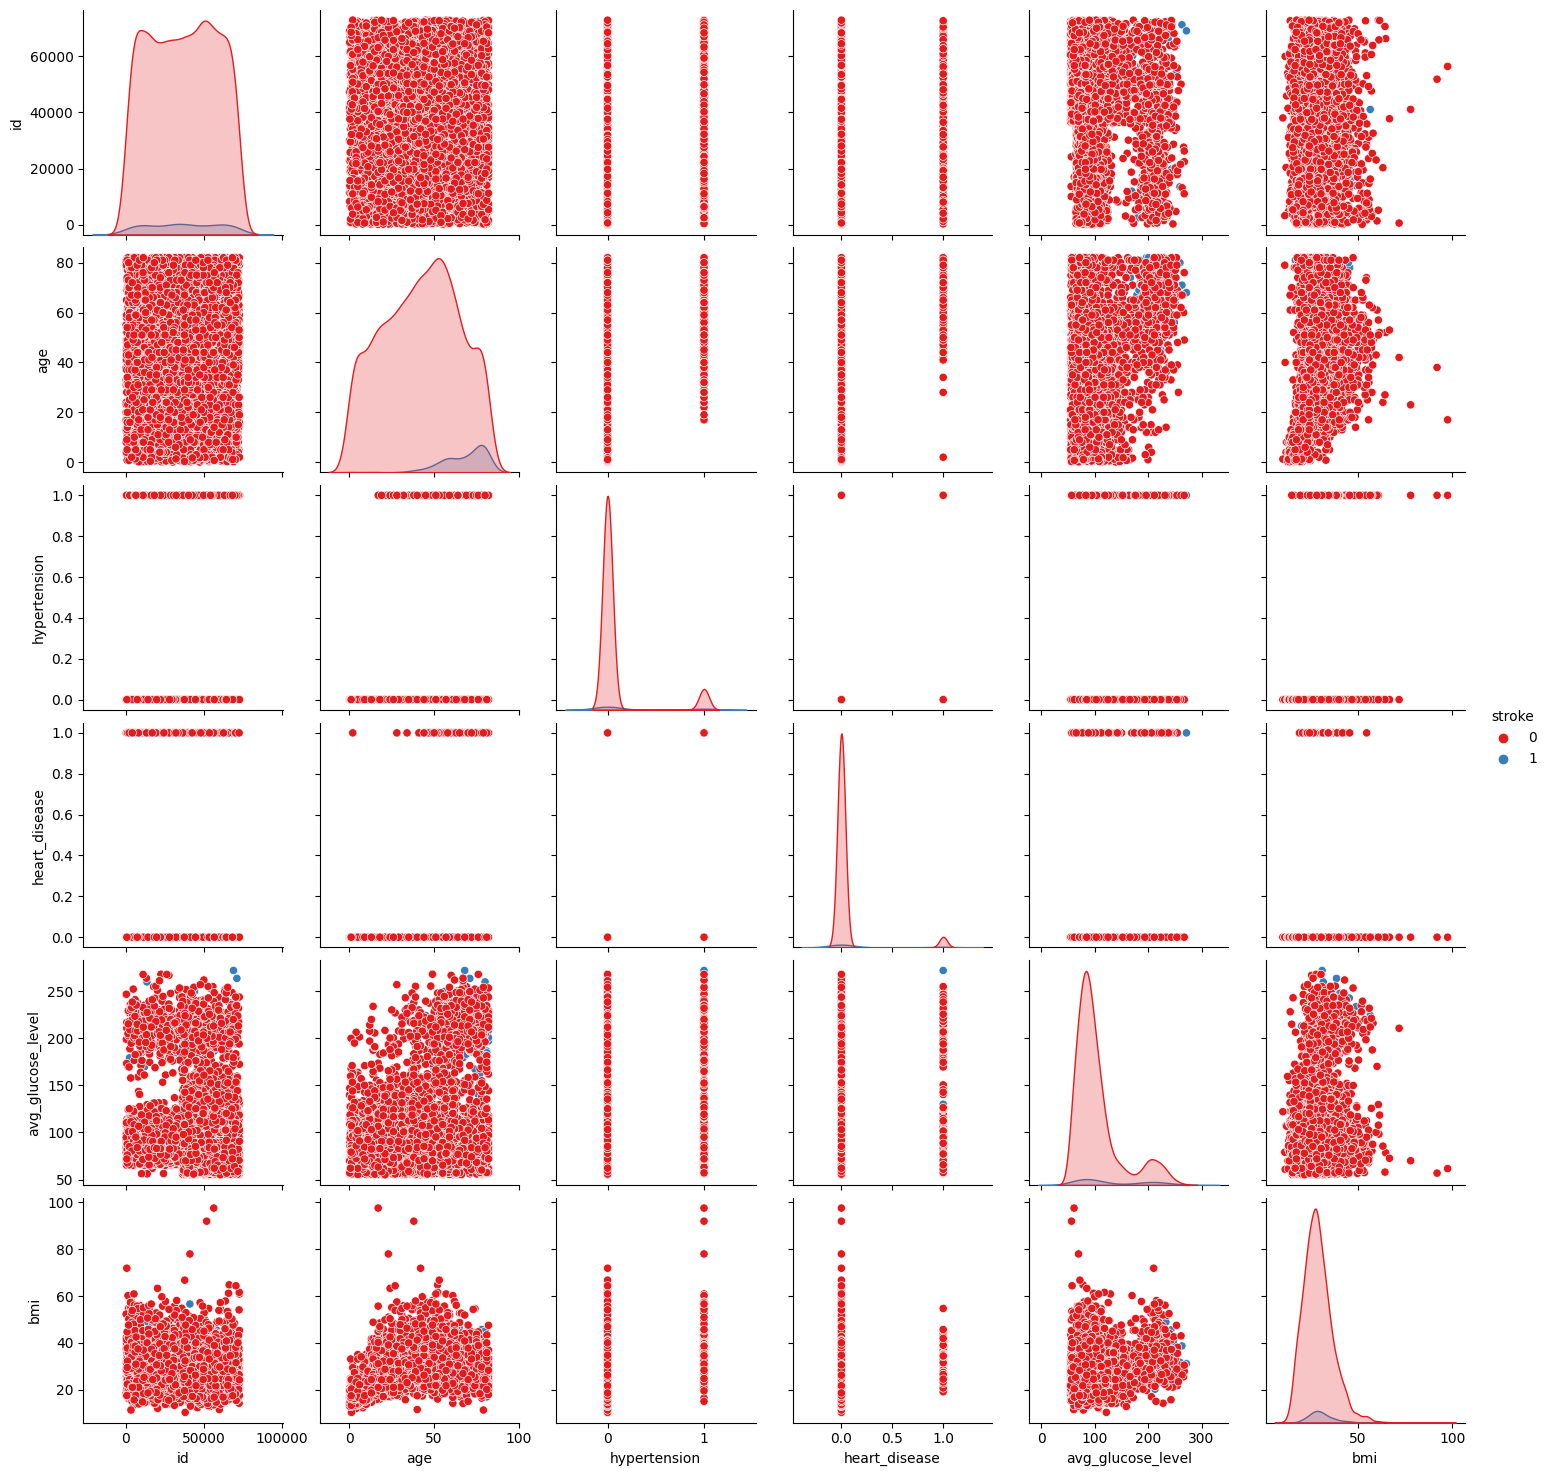

In [45]:
# Drop 'id'
data = df.drop(columns=['id'])

fig = plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(df, hue="stroke", palette="Set1")
plt.show()

c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


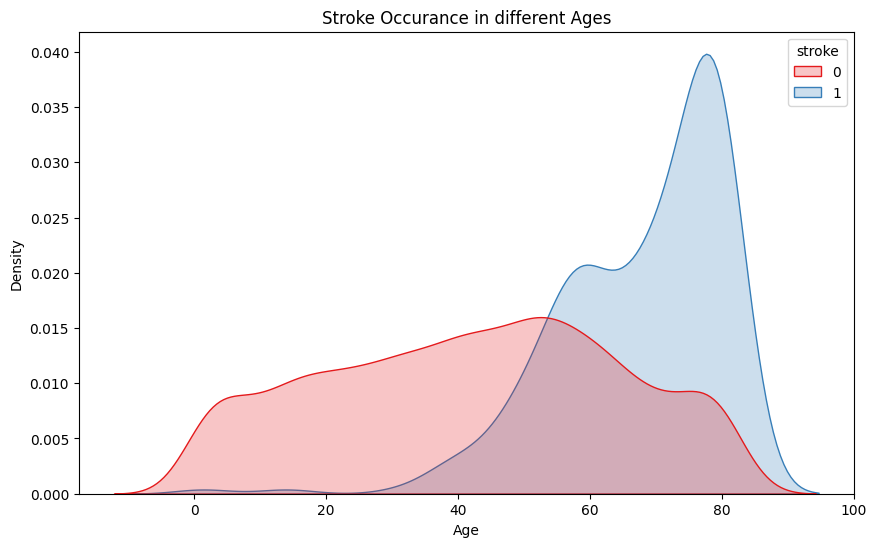

In [46]:
# Density plot of 'age' for each 'stroke' category
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='stroke', fill=True, common_norm=False, palette="Set1")
plt.title('Stroke Occurance in different Ages')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\users\esambatireddyprasad\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_da

<Figure size 1000x600 with 0 Axes>

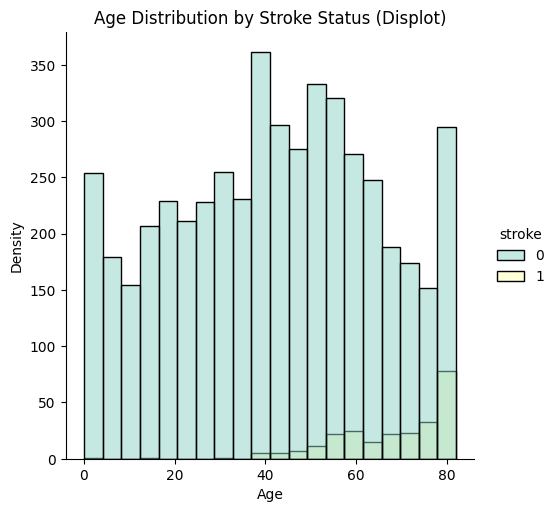

In [47]:
plt.figure(figsize=(10, 6))
sns.displot(data=df, x="age", hue="stroke",bins=20, palette="Set3")
plt.title('Age Distribution by Stroke Status (Displot)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

## Feature Engineering 

#### Binning

In [50]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [51]:
df.avg_glucose_level.value_counts()

avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: count, Length: 3979, dtype: int64

| Bin Range | Lables |
|-----------|---------|
|0-140   | normal|
|141-200| pre-diabetic|
|201-400| diabetic|

In [52]:
# Binning based on ranges for avg_gulcose_level
bins = [0,140,200,400]
labels = ['normal','pre-diabetic','diabetic']
df['is_diabetic'] = pd.cut(df['avg_glucose_level'], bins= bins, labels=labels)

In [53]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_diabetic
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,diabetic
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,diabetic
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,normal
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,pre-diabetic
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,pre-diabetic


In [54]:
#  Binning based on ranges for bmi
bins = [0,18.5,25,30,150]
labels = ['underweight','healthy','overweight','obese']
df['bmi_status'] = pd.cut(df['bmi'], bins= bins, labels=labels)

In [56]:
#Binning based on range of age
bins = [0,30,50,70,100]
labels = ['young','moderate','old','very_old']
df['age_range'] = pd.cut(df['age'], bins= bins, labels=labels)

In [57]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_diabetic,bmi_status,age_range
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,diabetic,obese,old
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,diabetic,NaN,old
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,normal,obese,very_old
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,pre-diabetic,obese,moderate
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,pre-diabetic,healthy,very_old


In [58]:
#Summing up age,bmi and avg_gulcose level columns
df['age_bmi_gulcose'] = df['age']+ df['bmi']+ df['avg_glucose_level']
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_diabetic,bmi_status,age_range,age_bmi_gulcose
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,diabetic,obese,old,332.29
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,diabetic,NaN,old,NaN
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,normal,obese,very_old,218.42
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,pre-diabetic,obese,moderate,254.63
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,pre-diabetic,healthy,very_old,277.12


In [59]:
#Finding ratio of avg_glucose_level and age and creating new category
df['avg_glucose_level_age_ratio'] = df['avg_glucose_level']/df['age']

In [60]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_diabetic,bmi_status,age_range,age_bmi_gulcose,avg_glucose_level_age_ratio
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,diabetic,obese,old,332.29,3.413284
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,diabetic,NaN,old,NaN,3.314918
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,normal,obese,very_old,218.42,1.324000
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,pre-diabetic,obese,moderate,254.63,3.494490
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,pre-diabetic,healthy,very_old,277.12,2.204051


In [61]:
#Finding ratio of bmi and age and creating new category
df['bmi_age_ratio'] = df['bmi']/df['age']

In [62]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_diabetic,bmi_status,age_range,age_bmi_gulcose,avg_glucose_level_age_ratio,bmi_age_ratio
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,diabetic,obese,old,332.29,3.413284,0.546269
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,diabetic,NaN,old,NaN,3.314918,NaN
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,normal,obese,very_old,218.42,1.324000,0.406250
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,pre-diabetic,obese,moderate,254.63,3.494490,0.702041
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,pre-diabetic,healthy,very_old,277.12,2.204051,0.303797


In [65]:
a = (df['is_diabetic']=="diabetic")
b = (df["bmi_status"]=="obese") 

In [66]:
df['dia_obese'] = a&b

In [67]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_diabetic,bmi_status,age_range,age_bmi_gulcose,avg_glucose_level_age_ratio,bmi_age_ratio,dia_obese
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,diabetic,obese,old,332.29,3.413284,0.546269,True
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,diabetic,NaN,old,NaN,3.314918,NaN,False
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,normal,obese,very_old,218.42,1.324000,0.406250,False
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,pre-diabetic,obese,moderate,254.63,3.494490,0.702041,False
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,pre-diabetic,healthy,very_old,277.12,2.204051,0.303797,False


In [68]:
#Creating new category for person with diabetic and over-weight
c=(df["is_diabetic"]=="diabetic")
d=(df["bmi_status"]=="overweight") 
df['dia_overweight'] = c & d

In [69]:
#Creating new category for person with diabetic and heaalthy
e=(df["is_diabetic"]=="diabetic")
f=(df["bmi_status"]=="healthy") 
df['dia_healthy'] = e & f

In [70]:
#Creating new category for person with pre-diabetic and obese
e=(df["is_diabetic"]=="pre-diabetic")
f=(df["bmi_status"]=="obese") 
df['predia_obese'] = e & f

In [71]:
#Creating new category for person with pre-diabetic and overweight
e=(df["is_diabetic"]=="pre-diabetic")
f=(df["bmi_status"]=="overweight") 
df['predia_overweight'] = e & f

In [72]:
#Creating new category for person with pre-diabetic and healthy
e=(df["is_diabetic"]=="pre-diabetic")
f=(df["bmi_status"]=="healthy") 
df['predia_healthy'] = e & f

In [73]:
#Creating new category for person working in private sector and diabetic

a = (df['work_type'] == 'Private')
b = (df["is_diabetic"]=="diabetic")
df['private_diabetic'] = a & b

In [74]:
#Creating new category for person working in private sector and pre-diabetic

a = (df['work_type'] == 'Private')
b = (df["is_diabetic"]=="pre-diabetic")
df['private_prediabetic'] = a & b

In [75]:
#Creating new feature for person is married and diabetic

a = (df['ever_married'] == 'Yes')
b = (df["is_diabetic"]=="diabetic")
df['married_diabetic'] = a & b

In [76]:
#Creating new feature for person is married and pre-diabetic

a = (df['ever_married'] == 'Yes')
b = (df["is_diabetic"]=="pre-diabetic")
df['married_prediabetic'] = a & b

In [77]:
#Creating new feature for person is married and having hypertension

a = (df['ever_married'] == 'Yes')
b= (df['hypertension'] == '1')
df['married_hypertension'] = a & b

In [78]:
#Creating new feature for person is diabetic and having hypertension

a = (df['hypertension'] == '1')
b= (df["is_diabetic"]=="diabetic")
df['diabetic_hyper'] = a & b

In [79]:
#Creating new feature for person is pre-diabetic and having hypertension

a = (df['hypertension'] == '1')
b= (df["is_diabetic"]=="pre-diabetic")
df['married_hyper'] = a & b

In [80]:
#combining different features

a = (df['dia_obese'] == '1')
b = (df['heart_disease'] == '1') 
df['dia_obese_heart'] = a & b

In [81]:
a = (df['dia_overweight'] == '1')
b = (df['heart_disease'] == '1') 
df['dia_overweight_heart'] = a & b

In [82]:
a = (df['dia_healthy'] == '1')
b = (df['heart_disease'] == '1') 
df['dia_healthy_heart'] = a & b

In [83]:
a = (df['predia_obese'] == '1')
b = (df['heart_disease'] == '1') 
df['predia_obese_heart'] = a & b

In [84]:
a = (df['predia_overweight'] == '1')
b = (df['heart_disease'] == '1') 
df['predia_overweight_heart'] = a & b

In [85]:
a = (df['predia_healthy'] == '1')
b = (df['heart_disease'] == '1') 
df['predia_healthy_heart'] = a & b

In [86]:
a = (df['private_diabetic'] == '1')
b = (df['heart_disease'] == '1') 
df['private_diabetic_heart'] = a & b

In [87]:
a = (df['private_prediabetic'] == '1')
b = (df['heart_disease'] == '1') 
df['private_prediabetic_heart'] = a & b

In [88]:
a = (df['married_diabetic'] == '1')
b = (df['heart_disease'] == '1') 
df['married_diabetic_heart'] = a & b

In [89]:
a = (df['married_hypertension'] == '1')
b = (df['heart_disease'] == '1') 
df['married_hypertension_heart'] = a & b

In [90]:
a = (df['diabetic_hyper'] == '1')
b = (df['heart_disease'] == '1') 
df['diabetic_hyper_heart'] = a & b

In [91]:
a = (df['married_hyper'] == '1')
b = (df['heart_disease'] == '1') 
df['married_hyper_heart'] = a & b

In [92]:
a = (df['age_range'] == 'very_old')
b = (df['heart_disease'] == '1')
df['veryold_heart'] = a & b

In [93]:
a = (df['age_range'] == 'old')
b = (df['heart_disease'] == '1')
df['old_heart'] = a & b

In [94]:
a = (df['age_range'] == 'old')
b = (df['is_diabetic'] == 'diabetic')
df['old_diabetic'] = a & b

In [95]:
a = (df['age_range'] == 'very-old')
b = (df['is_diabetic'] == 'diabetic')
df['veryold_diabetic'] = a & b

In [96]:
a = (df['age_range'] == 'old')
b = (df['is_diabetic'] == 'pre-diabetic')
df['old_prediabetic'] = a & b

In [97]:
a = (df['age_range'] == 'very-old')
b = (df['is_diabetic'] == 'pre-diabetic')
df['veryold_prediabetic'] = a & b

In [98]:
a = (df['veryold_prediabetic'] == '1')
b = (df['bmi_status'] == 'obese')
df['veryold_prediabetic_obese'] = a & b

In [99]:
a = (df['veryold_prediabetic'] == '1')
b = (df['bmi_status'] == 'overweight')
df['veryold_prediabetic_overweight'] = a & b

In [100]:
a = (df['veryold_diabetic'] == '1')
b = (df['bmi_status'] == 'obese')
df['veryold_diabetic_obese'] = a & b

In [101]:
a = (df['veryold_diabetic'] == '1')
b = (df['bmi_status'] == 'overweight')
df['veryold_diabetic_overweight'] = a & b

In [102]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,veryold_heart,old_heart,old_diabetic,veryold_diabetic,old_prediabetic,veryold_prediabetic,veryold_prediabetic_obese,veryold_prediabetic_overweight,veryold_diabetic_obese,veryold_diabetic_overweight
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,False,False,True,False,False,False,False,False,False,False
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,...,False,False,True,False,False,False,False,False,False,False
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,False,False,False,False,False,False,False,False,False,False
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,False,False,False,False,False,False,False,False,False,False
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,False,False,False,False,False,False,False,False,False,False


In [103]:
df = df.replace(True, 1)
df = df.replace(False, 0)

C:\Users\EsambatiReddyPrasad\AppData\Local\Temp\ipykernel_16944\3823658421.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(False, 0)


In [104]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,veryold_heart,old_heart,old_diabetic,veryold_diabetic,old_prediabetic,veryold_prediabetic,veryold_prediabetic_obese,veryold_prediabetic_overweight,veryold_diabetic_obese,veryold_diabetic_overweight
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,0,0,1,0,0,0,0,0,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,...,0,0,1,0,0,0,0,0,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,0,0,0,0,0,0,0,0,0,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,0,0,0,0,0,0,0,0,0,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sns.pairplot(df)